In [1]:
import pandas as pd
import numpy as np

In [2]:
cd ..

/Users/luis/Ironhack_DAFT_ClassLab/ClassLabWeek2


In [3]:
cd ..

/Users/luis/Ironhack_DAFT_ClassLab


In [4]:
data=pd.read_csv('ClassLabWeek1/ClassLabDay3/marketing_customer_analysis.csv')

In [5]:
def standarize_col(col):
    return col.lower().replace(" ", "_")

new_cols = []
for col in data.columns.to_list():
    new_cols.append(standarize_col(col))
    
import statistics as stats

def data_trans(data):
    data.columns = new_cols
    data = data.rename({'unnamed:_0': 'unnamed'}, axis=1)
    data["state"].fillna("Unkown", inplace = True)
    data["response"].fillna("Unkown", inplace = True)
    data["vehicle_class"].fillna("Unkown", inplace = True)
    data["vehicle_size"].fillna("Unkown", inplace = True)
    data["vehicle_type"].fillna("Unkown", inplace = True)
    mean_months_since_last_claim = round(stats.mean(data["months_since_last_claim"].dropna()),2)
    mean_number_of_open_complaints = round(stats.mean(data["number_of_open_complaints"].dropna()),2)
    data["months_since_last_claim"] = data["months_since_last_claim"].replace(to_replace = np.nan, value = mean_months_since_last_claim)
    data["number_of_open_complaints"] = data["number_of_open_complaints"].replace(to_replace = np.nan, value = mean_number_of_open_complaints)
    data['effective_to_date']=pd.to_datetime(data['effective_to_date'], errors = "coerce")
    data['month_number'] = data['effective_to_date'].dt.strftime('%-m')
    data = data.query('month_number == "1" or month_number == "2" or month_number == "3"')
    return data 

In [6]:
df = data_trans(data)

### 1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [7]:
df.dtypes

unnamed                                   int64
customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                        

In [8]:
df_numerical = df._get_numeric_data()
df_categorical = df.drop(columns=df_numerical.columns)

Numerical: 

In [9]:
list(df_numerical.columns)

['unnamed',
 'customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

Categorical: 

In [10]:
list(df_categorical.columns)

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type',
 'month_number']

### 2. Now we will try to check the normality of the numerical variables visually:

#### - Use seaborn library to construct distribution plots for the numerical variables

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
dfnum =df.select_dtypes(np.number)

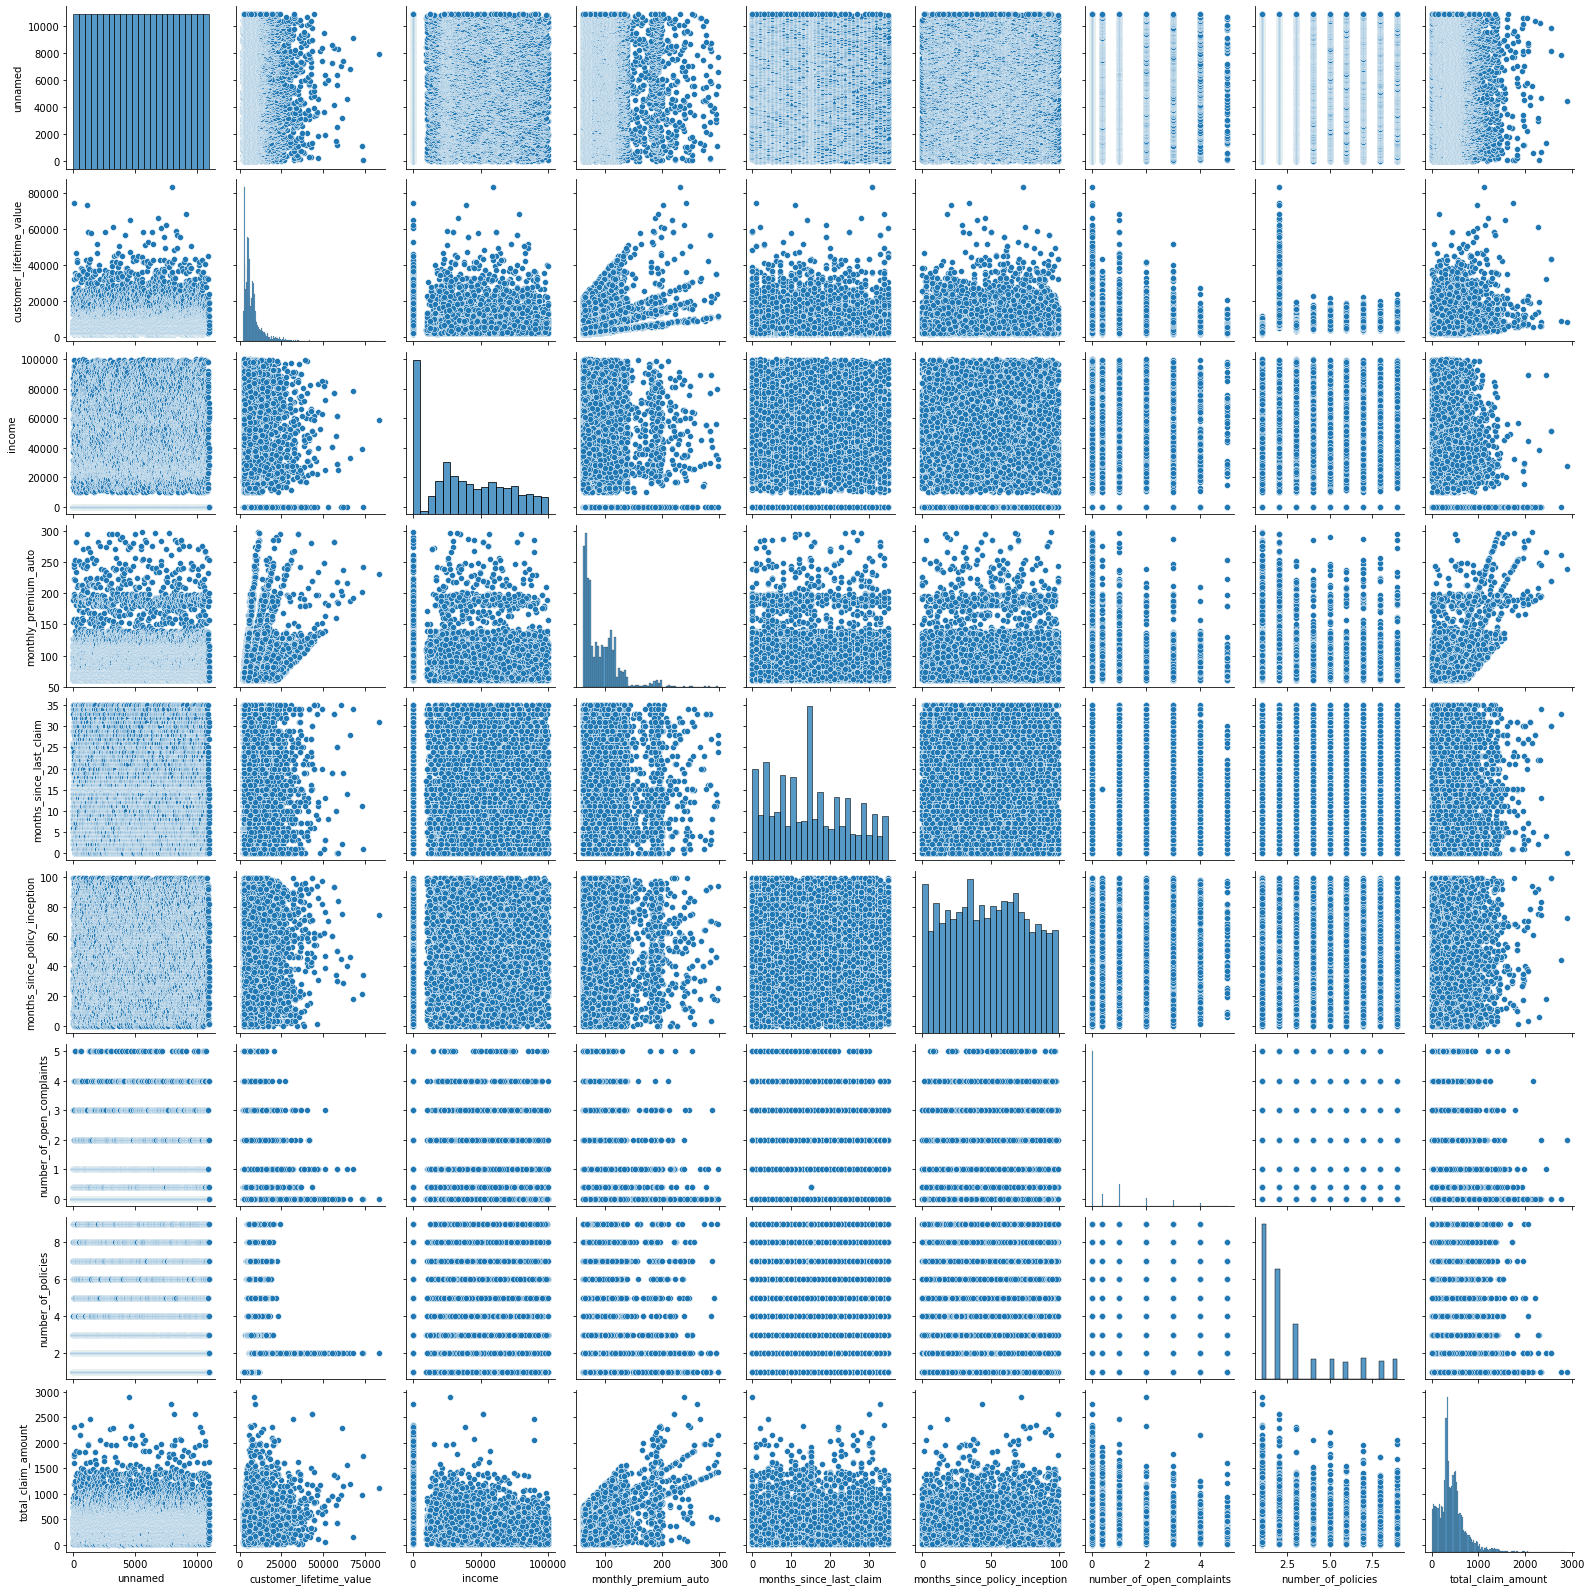

In [13]:
sns.pairplot(dfnum,)
plt.show()

#### - Use Matplotlib to construct histograms

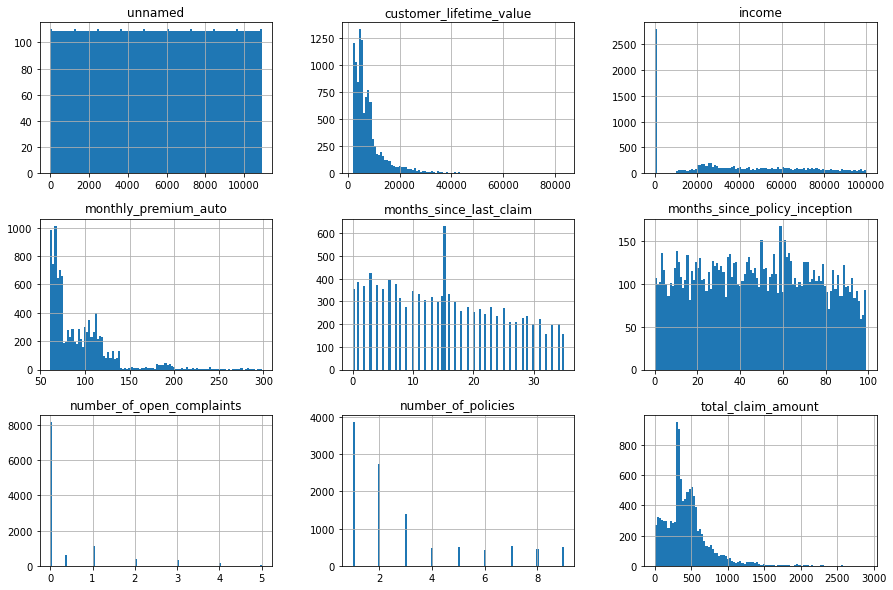

In [14]:
dfnum.hist(bins=100, figsize=(15, 10));

### - Do the distributions for different numerical variables look like a normal distribution?

customer_life_value, monthly_premium_auto and total_claim_amount are Log Normal, all of them right skewed.

### 3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [15]:
corr_data = dfnum
correlations_matrix = corr_data.corr()
correlations_matrix

,unnamed,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
unnamed,1.000000,0.001355,0.008910,0.000863,0.007722,0.012795,0.007129,0.002319,-0.000593
customer_lifetime_value,0.001355,1.000000,0.028306,0.403069,0.015683,0.016960,-0.031493,0.016024,0.232626
income,0.008910,0.028306,1.000000,-0.009788,-0.023126,-0.005903,0.006973,-0.009960,-0.354141
monthly_premium_auto,0.000863,0.403069,-0.009788,1.000000,0.008504,0.018953,-0.010066,-0.020505,0.631799
months_since_last_claim,0.007722,0.015683,-0.023126,0.008504,1.000000,-0.038155,0.002246,0.007425,0.012728
months_since_policy_inception,0.012795,0.016960,-0.005903,0.018953,-0.038155,1.000000,0.004246,-0.009123,0.003095
number_of_open_complaints,0.007129,-0.031493,0.006973,-0.010066,0.002246,0.004246,1.000000,0.003938,-0.011041
number_of_policies,0.002319,0.016024,-0.009960,-0.020505,0.007425,-0.009123,0.003938,1.000000,-0.008923
total_claim_amount,-0.000593,0.232626,-0.354141,0.631799,0.012728,0.003095,-0.011041,-0.008923,1.000000


### 4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features.

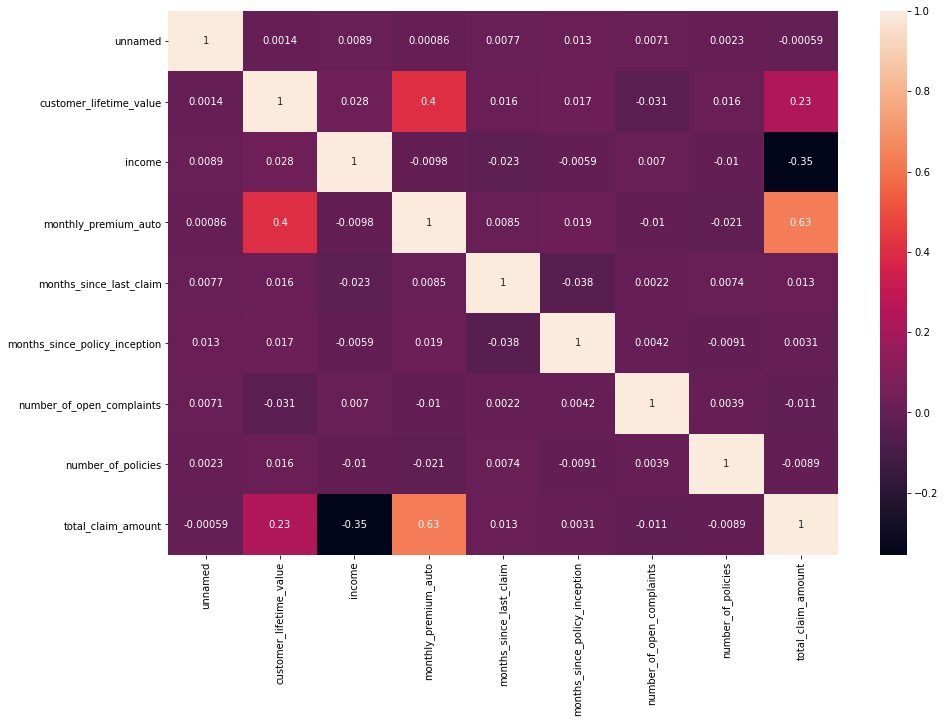

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(correlations_matrix,annot=True)
plt.show()